In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_datareader as data

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 2.0 MB/s eta 0:00:02
      --------------------------------------- 0.1/3.0 MB 544.7 kB/s eta 0:00:06
     - -------------------------------------- 0.1/3.0 MB 901.1 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/3.0 MB 706.2 kB/s eta 0:00:04
     --- ------------------------------------ 0.3/3.0 MB 1.1 MB/s eta 0:00:03
     --- ------------------------------------ 0.3/3.0 MB 947.5 kB/s eta 0:00:03
     ---- ----------------------------------- 0.3/3.0 MB 952.6 kB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 997.7 kB/s eta 0:00:03
     ------- -------------------------------- 0.6/3.0 MB 1.1 MB/s eta 0:00:03
     --------- ------------------------------ 0.7/3.0 MB 1.3 MB/s eta 0:00:02
     ------------ --------------------------- 0.9/3.0 MB 1.6 MB/s eta 0:00:02
     -------------- ------------------------- 1.1/3.0 MB 1.

In [13]:
import yfinance as yf
from datetime import datetime
current_date = datetime.now().strftime('%Y-%m-%d')

start = "2015-01-01"
end = current_date

df = yf.download('AAPL', start= start, end = end)
df.tail(10)

2024-08-29


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-15,224.600006,225.350006,222.759995,224.720001,224.720001,46414000
2024-08-16,223.919998,226.830002,223.649994,226.050003,226.050003,44340200
2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800
2024-08-20,225.770004,227.169998,225.449997,226.509995,226.509995,30299000
2024-08-21,226.520004,227.979996,225.050003,226.399994,226.399994,34765500
2024-08-22,227.789993,228.339996,223.899994,224.529999,224.529999,43695300
2024-08-23,225.660004,228.220001,224.330002,226.839996,226.839996,38677300
2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200
2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35934600


In [14]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373957,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687304,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689531,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021719,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944677,237458000


In [15]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


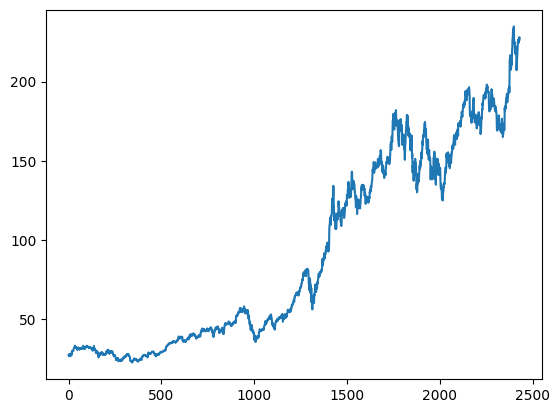

In [16]:
plt.plot(df.Close)

In [18]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2425    200.2844
2426    200.8644
2427    201.4397
2428    202.0318
2429    202.6009
Name: Close, Length: 2430, dtype: float64

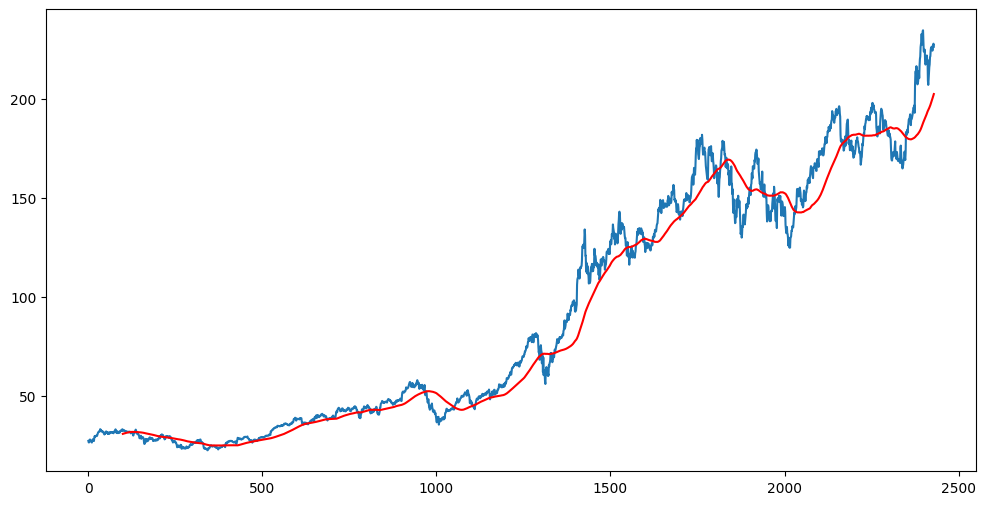

In [19]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [20]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2425    192.75785
2426    192.99590
2427    193.22270
2428    193.44840
2429    193.66880
Name: Close, Length: 2430, dtype: float64

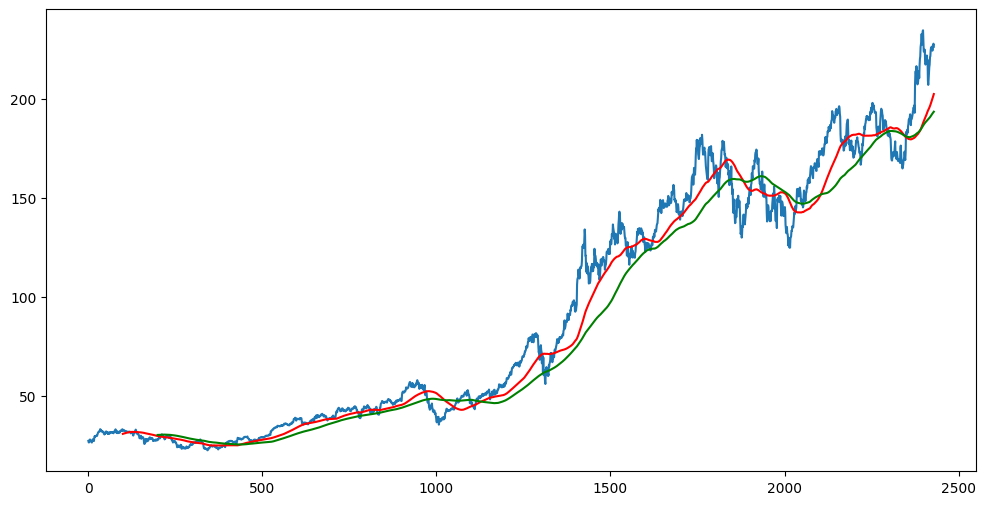

In [24]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [25]:
df.shape

(2430, 5)

In [28]:
#Training and Testing
data_tr = pd.DataFrame(df['Close'][0:int(len(df) * 0.70) ])
data_test = pd.DataFrame(df['Close'][int(len(df) * 0.70) : int(len(df))])


In [30]:
print(data_tr.shape)
print(data_test.shape)

(1701, 1)
(729, 1)


In [32]:
data_test.head(10)

,Close
1701,141.110001
1702,142.000000
1703,143.289993
1704,142.899994
1705,142.809998
1706,141.509995
1707,140.910004
1708,143.759995
1709,144.839996
1710,146.550003


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [34]:
data_tr_arr = scaler.fit_transform(data_tr)
data_tr_arr

array([[0.03540137],
       [0.0296596 ],
       [0.02967825],
       ...,
       [0.88673053],
       [0.89530586],
       [0.86913238]])

In [36]:
x_train = []
y_train = []

for i in range(100, data_tr_arr.shape[0]):
    x_train.append(data_tr_arr[i-100 : i])
    y_train.append(data_tr_arr[i, 0])



In [37]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [40]:
x_train.shape

(1601, 100, 1)

In [47]:
# Ml Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [48]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)



Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 111s 870ms/step - loss: 0.0726
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 44s 854ms/step - loss: 0.0082
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 813ms/step - loss: 0.0053
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 86s 875ms/step - loss: 0.0086
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 572ms/step - loss: 0.0056
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 43s 620ms/step - loss: 0.0043
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 749ms/step - loss: 0.0039
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 571ms/step - loss: 0.0043
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 520ms/step - loss: 0.0043
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 487ms/step - loss: 0.0043
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 493ms/step - loss: 0.0067
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 500ms/step - loss: 0.0046
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 488ms/step - loss: 0.0038
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 37s 732ms/step - loss: 0.0039
Epoch 15/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 43s

In [51]:
model.save('keras_model.h5')

In [52]:
data_test.head(10)

,Close
1701,141.110001
1702,142.000000
1703,143.289993
1704,142.899994
1705,142.809998
1706,141.509995
1707,140.910004
1708,143.759995
1709,144.839996
1710,146.550003


In [53]:
past_100_days = data_tr.tail(100)

In [55]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [56]:
final_df.head(5)

,Close
0,124.970001
1,127.449997
2,126.269997
3,124.849998
4,124.690002


In [57]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01285047],
       [0.03513655],
       [0.02453267],
       [0.01177208],
       [0.0103343 ],
       [0.03387847],
       [0.01698418],
       [0.03199135],
       [0.03019411],
       [0.02974476],
       [0.01563621],
       [0.00961538],
       [0.00664987],
       [0.01365921],
       [0.        ],
       [0.02111789],
       [0.02120777],
       [0.02875626],
       [0.03226093],
       [0.02309489],
       [0.03423793],
       [0.06236515],
       [0.05481666],
       [0.05939965],
       [0.07413724],
       [0.06218553],
       [0.07872036],
       [0.09381735],
       [0.09130118],
       [0.0886952 ],
       [0.08599927],
       [0.10100645],
       [0.1149353 ],
       [0.12059674],
       [0.12338248],
       [0.14755576],
       [0.1660676 ],
       [0.18898279],
       [0.17703094],
       [0.19383536],
       [0.18835368],
       [0.19859811],
       [0.23014011],
       [0.22411928],
       [0.20533786],
       [0.16993166],
       [0.20318109],
       [0.196

In [58]:
input_data.shape

(829, 1)

In [59]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [60]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(729, 100, 1)
(729,)


In [61]:
# Making Predictions
y_predicted = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 380ms/step


In [62]:
y_predicted.shape

(729, 1)

In [63]:
y_test

array([0.15789   , 0.16588783, 0.17748015, 0.17397548, 0.17316675,
       0.16148448, 0.15609275, 0.18170374, 0.19140901, 0.20677571,
       0.22663544, 0.23112861, 0.23310562, 0.22600647, 0.22555713,
       0.23166791, 0.22744432, 0.26087351, 0.23598131, 0.22843282,
       0.23795832, 0.25116825, 0.2464055 , 0.24928106, 0.24173257,
       0.24505747, 0.21908695, 0.21863761, 0.23768874, 0.23777855,
       0.24676489, 0.26914093, 0.30850101, 0.33258447, 0.33680806,
       0.34031273, 0.34507548, 0.29897551, 0.32979873, 0.37526959,
       0.37050684, 0.36143055, 0.34417679, 0.37544935, 0.42810918,
       0.46315598, 0.45848305, 0.50242625, 0.469087  , 0.45641623,
       0.50107835, 0.43781444, 0.42774978, 0.41525877, 0.44437457,
       0.46818831, 0.47393957, 0.51033427, 0.5009884 , 0.50179727,
       0.49119332, 0.48553202, 0.52543126, 0.50467283, 0.46171814,
       0.43547804, 0.4370057 , 0.43718547, 0.46315598, 0.46719981,
       0.43718547, 0.44509349, 0.41570812, 0.38362682, 0.36817

In [64]:
y_predicted

array([[0.20091458],
       [0.19654018],
       [0.19235666],
       [0.18855803],
       [0.18522812],
       [0.18244146],
       [0.18015373],
       [0.1782925 ],
       [0.17678292],
       [0.17563015],
       [0.17486666],
       [0.17454898],
       [0.17477787],
       [0.17567135],
       [0.17739475],
       [0.18013838],
       [0.18379381],
       [0.18812189],
       [0.1929836 ],
       [0.19809893],
       [0.2032328 ],
       [0.20816521],
       [0.21277323],
       [0.21697995],
       [0.22076935],
       [0.22411284],
       [0.2269977 ],
       [0.22930244],
       [0.23091672],
       [0.23187113],
       [0.2322661 ],
       [0.2322707 ],
       [0.23215336],
       [0.23238501],
       [0.23366836],
       [0.23669782],
       [0.24199693],
       [0.24959996],
       [0.2586112 ],
       [0.26831907],
       [0.27858272],
       [0.28932583],
       [0.30030164],
       [0.31100848],
       [0.32124558],
       [0.33143038],
       [0.34236306],
       [0.354

In [65]:
scaler.scale_

array([0.00898634])

In [66]:
scale_factor = 1 / 0.00898634
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

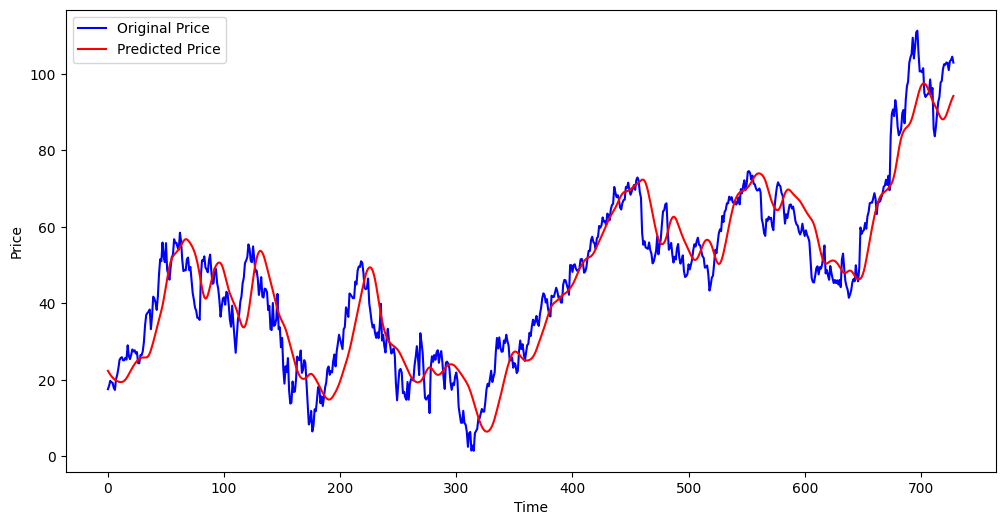

In [68]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_predicted, 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()